# Deepfake Detection

Team: Max Cao, Alina Chen, Zoe Ji

## Import Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import pandas as pd
from collections import Counter

src_directory = '/content/drive/MyDrive/deepfake_jpg/original_image'  # Source directory with original images

# Initialize lists to store data
image_names = []
folder_names = []
classes = []

# Iterate over each folder in the src_directory
for folder_name in os.listdir(src_directory):
    folder_path = os.path.join(src_directory, folder_name)

    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            # Extract image name and class from file name
            image_name, file_extension = os.path.splitext(file_name)
            image_class = "real" if "_real" in image_name else "fake"

            # Append data to lists
            image_names.append(image_name)
            folder_names.append(folder_name)
            classes.append(image_class)

# Create DataFrame
data = {'image_name': image_names, 'folder_name': folder_names, 'class': classes}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
print("")
print(df['class'].value_counts())

            image_name        folder_name class
0      malvlezlqf_fake  dfdc_train_part_8  fake
1      mbcasihfhc_fake  dfdc_train_part_8  fake
2      mboqxfdrso_fake  dfdc_train_part_8  fake
3      mathczokbt_fake  dfdc_train_part_8  fake
4      mcesdhhpkp_fake  dfdc_train_part_8  fake
...                ...                ...   ...
19905  falturjtfd_fake  dfdc_train_part_7  fake
19906  fbauuanxsc_fake  dfdc_train_part_7  fake
19907  fcmdzspgeh_fake  dfdc_train_part_7  fake
19908  fbjdjgthyh_fake  dfdc_train_part_7  fake
19909  fbnveezzal_fake  dfdc_train_part_7  fake

[19910 rows x 3 columns]

class
fake    17398
real     2512
Name: count, dtype: int64


## Face detection with MTCNN

In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.5 MB/s eta 0:00:00


In [ ]:
import os
from PIL import Image
from mtcnn.mtcnn import MTCNN
import numpy as np

src_directory = '/content/drive/MyDrive/deepfake_jpg/original_image'  # Source directory with original images
face_directory = '/content/drive/MyDrive/deepfake_jpg/face_image'  # Destination directory for face images

detector = MTCNN()

# for each folder in the src_directory, go to the folder:
for folder_name in os.listdir(src_directory):
    folder_path = os.path.join(src_directory, folder_name)
    if os.path.isdir(folder_path):
      print(f'Working on folder: {folder_name}')
      # for each file in the folder:
      for filename in os.listdir(folder_path):
          if filename.endswith('.jpg'):
              # if the file is not already in the face_directory:
              if filename not in os.listdir(face_directory):
                img_path = os.path.join(folder_path, filename)
                img = Image.open(img_path)
                # Convert the image to RGB (required by MTCNN)
                img = img.convert('RGB')
                pixels = np.array(img)

                # Detect faces in the image
                results = detector.detect_faces(pixels)

                # Only proceed with images with 1 face
                if len(results) == 1:
                  # Process each face found
                  for i, result in enumerate(results):
                      x, y, width, height = result['box']
                      x, y = max(0, x), max(0, y) # Adjust for any negative pixel index
                      face = img.crop((x, y, x + width, y + height)) # Crop the face from the image
                      # Define the output path for the cropped face image
                      face_filename = f"{os.path.splitext(filename)[0]}.jpg"
                      face_path = os.path.join(face_directory, face_filename)
                      # Save the cropped face image
                      face.save(face_path)
                      print(f"Face {i+1} saved to {face_path}")
                else:
                  print(f"No face or more than 2 faces found in {filename}")

Working on folder: dfdc_test_part_0
1/1 [==============================] - 0s 167ms/step
Face 1 saved to /content/drive/MyDrive/deepfake_jpg/face_image_test/adohdulfwb.jpg
1/1 [==============================] - 0s 74ms/step
Face 1 saved to /content/drive/MyDrive/deepfake_jpg/face_image_test/aassnaulhq.jpg
2/2 [==============================] - 0s 46ms/step
No face or more than 2 faces found in acazlolrpz.jpg
1/1 [==============================] - 0s 102ms/step
Face 1 saved to /content/drive/MyDrive/deepfake_jpg/face_image_test/aayfryxljh.jpg
1/1 [==============================] - 0s 94ms/step
Face 1 saved to /content/drive/MyDrive/deepfake_jpg/face_image_test/aomqqjipcp.jpg
1/1 [==============================] - 0s 32ms/step
Face 1 saved to /content/drive/MyDrive/deepfake_jpg/face_image_test/apedduehoy.jpg
1/1 [==============================] - 0s 31ms/step
Face 1 saved to /content/drive/MyDrive/deepfake_jpg/face_image_test/aktnlyqpah.jpg
1/1 [==============================] - 0s 54ms/

KeyboardInterrupt: 

In [ ]:
# Create a summary data frame
import os
import re
import pandas as pd

filename_list = []
class_list = []
pattern = re.compile(r'_(real|fake)\.')
face_directory = '/content/drive/MyDrive/deepfake_jpg/face_image'

for filename in os.listdir(face_directory):

    # Match class base on suffix
    match = pattern.search(filename)
    class_label = match.group(1) if match else 'unknown'

    # Append the filename and text to the respective lists
    image_name, file_extension = os.path.splitext(filename)
    filename_list.append(image_name)
    class_list.append(class_label)

# Create a DataFrame with the filename and text
face_df = pd.DataFrame({'image_name': filename_list, 'class': class_list})

merged_df = pd.merge(face_df, df[['image_name', 'folder_name']], on='image_name', how='left')

# Display the merged DataFrame
print(merged_df)
print("")
print(merged_df['class'].value_counts())
print("")
print(merged_df['folder_name'].value_counts())

           image_name class        folder_name
0     aqiwuvxump_fake  fake  dfdc_train_part_4
1     ardijxbxdm_real  real  dfdc_train_part_4
2     aqywnbekqk_fake  fake  dfdc_train_part_4
3     arrprgeura_real  real  dfdc_train_part_4
4     asgfrovmom_real  real  dfdc_train_part_4
...               ...   ...                ...
9398  xkbvqelobg_fake  fake  dfdc_train_part_9
9399  aqufcpfqnd_fake  fake  dfdc_train_part_8
9400  bhvssfromy_real  real  dfdc_train_part_9
9401  pqywogwvke_fake  fake  dfdc_train_part_9
9402  neipvzqojf_fake  fake  dfdc_train_part_9

[9403 rows x 3 columns]

class
fake       8169
real       1232
unknown       2
Name: count, dtype: int64

folder_name
dfdc_train_part_1    1484
dfdc_train_part_9    1443
dfdc_train_part_2    1282
dfdc_train_part_8    1255
dfdc_train_part_0    1193
dfdc_train_part_3    1133
dfdc_train_part_4    1013
dfdc_train_part_5     598
Name: count, dtype: int64


In [ ]:
# Show some extracted faces
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

face_directory = '/content/drive/MyDrive/deepfake_jpg/face_image/train_set'

image_files = [f for f in os.listdir(face_directory) if f.endswith('.jpg')]

fake_count = 0
real_count = 0
selected_image_files = []

for img_file in image_files:
    if img_file.endswith('_fake.jpg') and fake_count < 5: # number of fake images
        selected_image_files.append(img_file)
        fake_count += 1
    elif img_file.endswith('_real.jpg') and real_count < 4: # number of real images
        selected_image_files.append(img_file)
        real_count += 1

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))

for ax, img_file in zip(axes.flatten(), selected_image_files):
    img_path = os.path.join(face_directory, img_file)
    image = mpimg.imread(img_path)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(img_file)

plt.tight_layout()
plt.show()

## Train-test split

In [ ]:
import os
import shutil

# Define source directory and destination directories for train and test sets
face_directory = '/content/drive/MyDrive/deepfake_jpg/face_image'
train_directory = '/content/train_set'
test_directory = '/content/test_set'

# Iterate through the merged DataFrame
for index, row in merged_df.iterrows():
    image_name = row['image_name']
    folder_name = row['folder_name']
    class_name = row['class']

    # Use 'dfdc_train_part_9' as the test set
    if 'dfdc_train_part_9' in folder_name:
        destination_directory = test_directory
    else:
        destination_directory = train_directory

    # Create destination directory if it doesn't exist
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Copy the image from source to destination directory
    source_path = os.path.join(face_directory, image_name + '.jpg')
    shutil.copy(source_path, destination_directory)

print("Images copied to train and test sets successfully.")

NameError: name 'merged_df' is not defined

In [ ]:
import os
import shutil
import pandas as pd

# Define directories
face_directory = '/content/drive/MyDrive/deepfake_jpg/face_image'
train_set_directory = '/content/drive/MyDrive/deepfake_jpg/face_image/train_set'
test_set_directory = '/content/drive/MyDrive/deepfake_jpg/face_image/test_set'

for index, row in merged_df.iterrows():
    image_name = row['image_name']
    folder_name = row['folder_name']

    source_path = os.path.join(face_directory, image_name + '.jpg')
    if folder_name == 'dfdc_train_part_9':
        destination_path = os.path.join(test_set_directory, image_name + '.jpg')
    else:
        destination_path = os.path.join(train_set_directory, image_name + '.jpg')

    try:
        # Move the image to the appropriate directory
        shutil.move(source_path, destination_path)
        print(f"Moved {image_name} successfully.")
    except FileNotFoundError:
        print(f"File {image_name} not found.")
    except Exception as e:
        print(f"Error moving {image_name}: {e}")


Streaming output truncated to the last 5000 lines.
File arkwqyuthh_fake not found.
File aqrsylrzgi_fake not found.
File assnxglavo_fake not found.
File atuvrbyqor_fake not found.
File atrmrdhzrk_fake not found.
File aunqfjmfqp_fake not found.
File atisizneup_fake not found.
File asweglrfni_fake not found.
File avhnnjtuqw_fake not found.
File avlmlshqjh_fake not found.
File avfhsplmya_fake not found.
File awnhnhbbxm_fake not found.
File awjywmwplp_fake not found.
File axefxbvfyn_fake not found.
File bateuibxti_fake not found.
File axjbcvrvje_fake not found.
File axgkbpxjvr_fake not found.
File basjckrjdf_fake not found.
File bbwbopxbrv_fake not found.
File bciuzbjoxq_fake not found.
File bcbqxhziqz_real not found.
File bcunmpqmwf_fake not found.
File bdshuoldwx_fake not found.
File bdgcinijzt_fake not found.
File bdvqwpqmag_fake not found.
File bdpwzkrofr_fake not found.
File beclytxiol_fake not found.
File bfeewgzrbr_fake not found.
File bfmvjimrqn_fake not found.
File bewbohouqa_fake 

In [ ]:
face_directory = '/content/drive/MyDrive/deepfake_jpg/face_image'
train_set_directory = '/content/drive/MyDrive/deepfake_jpg/face_image/train_set'
test_set_directory = '/content/drive/MyDrive/deepfake_jpg/face_image/test_set'


face_files = os.listdir(face_directory)
print("Number of files in face_directory:", len(face_files))
train_files = os.listdir(train_set_directory)
print("Number of files in train_directory:", len(train_files))
test_files = os.listdir(test_set_directory)
print("Number of files in test_directory:", len(test_files))

Number of files in face_directory: 2
Number of files in train_directory: 7958
Number of files in test_directory: 1443


## Building Models

In [ ]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as transforms

class CustomDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.dataframe.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = self.dataframe.iloc[idx, 1]  # Adjust depending on how labels are stored
        return image, label
import re

files = os.listdir('/content/drive/MyDrive/deepfake_jpg/face_image')
data = {'Filename': files, 'Class': [1 if 'real' in f else 0 for f in files]}
df = pd.DataFrame(data)

# Split into train, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Class'])
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Image transformations
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop((256, 256), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    #transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2470, 0.2435, 0.2616])
])

test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    #transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2470, 0.2435, 0.2616])
])

# Creating datasets
train_dataset = CustomDataset(train_df, '/content/drive/MyDrive/deepfake_jpg/face_image', transform=train_transform)
val_dataset = CustomDataset(val_df, '/content/drive/MyDrive/deepfake_jpg/face_image', transform=test_transform)
test_dataset = CustomDataset(test_df, '/content/drive/MyDrive/deepfake_jpg/face_image', transform=test_transform)

# Data loaders
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4)


NameError: name 'train_test_split' is not defined

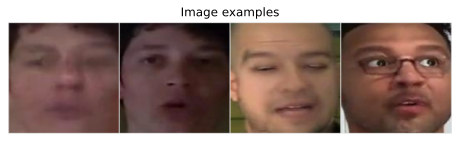

In [ ]:
# Visualize some examples
NUM_IMAGES = 4
images = torch.stack([val_dataset[idx][0] for idx in range(NUM_IMAGES)], dim=0)
img_grid = torchvision.utils.make_grid(images, nrow=4, normalize=True, pad_value=0.9)
img_grid = img_grid.permute(1, 2, 0)

plt.figure(figsize=(8,8))
plt.title("Image examples")
plt.imshow(img_grid)
plt.axis('off')
plt.show()
plt.close()

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

# Define the directory containing the images
train_dir = "deepfake/train"

# Create the image dataset from the directory
train_dataset, valid_dataset = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=(32,32),
    batch_size=32,
    color_mode="rgb",
    shuffle=True,
    seed=12345,
    validation_split=.25,
    subset="both"
)

Found 0 files belonging to 0 classes.
Using 0 files for training.
Using 0 files for validation.


ValueError: No training images found in directory deepfake/train. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

## Base CNN Model

In [ ]:
#Base CNN
import numpy as np
import keras
from keras import layers
from keras.models import Model

# Define the input layer
input_layer = keras.Input(shape=(32,32,1))

# Rescale the input
rescale_layer = layers.Rescaling(scale=1./255)(input_layer)

x = layers.Conv2D(16, 3, padding="same")(rescale_layer)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

for size in [32, 64, 128, 256]:
    x = layers.Conv2D(size, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.MaxPooling2D(2, strides=2, padding="same")(x)

x = layers.Flatten()(x)

x = layers.Dense(units=256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)

x = layers.Dense(units=256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)

output_layer = layers.Dense(units=10, activation='softmax')(x)

model = keras.Model(input_layer,output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 16)        64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                             

In [ ]:
from keras.callbacks import ModelCheckpoint
#Create a model checkpoint
# Define the filepath for saving the model
filepath = 'base_cnn_deepfake.keras'

# Create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Add the callback to the list of callbacks in the fit() method
callbacks = [checkpoint]

# Train the model and monitor the training and validation accuracy
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=callbacks
)